In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
from nltk import bigrams
import itertools
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [2]:
# Read your CSV file
df = pd.read_csv('../data/phone_ratings_cleaned.csv')
df.head()

,product_id,comment,comment_clean,rating
0,honor-x8b,đừng mua không có linh kiện,đừng mua không linh_kiện,1
1,honor-x8b,máy sao cũng được ghét nhất cái zalo vui nó bá...,máy ghét zalo vui báo hiện cuộc_gọi,3
2,honor-x8b,chiếc điện thoại mỏng nhất tôi từng dùng cũng ...,điện_thoại mỏng chip máy mượt,5
3,honor-x8b,sao hôm tôi mua lại không được tặng tai nghe n...,hôm mua không tặng tai giới_thiệu hôm đấy,4
4,honor-x8b,em mua được tuần trả lại mất bao nhiêu ạ,mua tuần trả bao nhiêu,3


# 1. One Hot Encoding

In [3]:
comments = df['comment_clean'].astype(str).tolist()

In [4]:
comment_one_hot_encoding = comments

In [5]:

vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(comment_one_hot_encoding)

In [6]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
vectorizer.get_feature_names_out()

array(['10', '100', '1000', ..., 'ổn_định', 'ủng_hộ', 'ứng_dụng'],
      dtype=object)

In [8]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=comment_one_hot_encoding)
df

,10,100,1000,1015,11,12,120,125,128,13,...,ốp,ốp_lưng,ốt,ồn,ồn_ào,ổn,ổn_áp,ổn_định,ủng_hộ,ứng_dụng
đừng mua không linh_kiện,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
máy ghét zalo vui báo hiện cuộc_gọi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
điện_thoại mỏng chip máy mượt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hôm mua không tặng tai giới_thiệu hôm đấy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua tuần trả bao nhiêu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
note pin không ổn nhanh hết pin không trâu lắm thua xiaoomi note 9 s mới mua tuần,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
mua xong giá giảm điện_thoại không ưa nổi thế_giới di_động nhân_viên chẳng tâm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
không hao pin tối thức dậy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sản_phẩm tệ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. Count Vectorizing

In [9]:
comments_count_vectorizer = comments
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments_count_vectorizer)

In [10]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=comments_count_vectorizer)
df

,10,100,1000,1015,11,12,120,125,128,13,...,ốp,ốp_lưng,ốt,ồn,ồn_ào,ổn,ổn_áp,ổn_định,ủng_hộ,ứng_dụng
đừng mua không linh_kiện,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
máy ghét zalo vui báo hiện cuộc_gọi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
điện_thoại mỏng chip máy mượt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hôm mua không tặng tai giới_thiệu hôm đấy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua tuần trả bao nhiêu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
note pin không ổn nhanh hết pin không trâu lắm thua xiaoomi note 9 s mới mua tuần,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
mua xong giá giảm điện_thoại không ưa nổi thế_giới di_động nhân_viên chẳng tâm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
không hao pin tối thức dậy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sản_phẩm tệ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3.N-grams

In [12]:
comments_n_grams = comments
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(comments_n_grams)

In [13]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=comments_n_grams)
df

,10 selfie,10 trieu,10 tắt,10 đêm,100 gb,100 tư_vấn,1000 lan_quan,1015 không,11 cũ,12 chống,...,ứng_dụng xoá,ứng_dụng zalo,ứng_dụng ô_vuông,ứng_dụng đi,ứng_dụng điện_thoại,ứng_dụng đôi,ứng_dụng đơ,ứng_dụng đối,ứng_dụng đột_ngột,ứng_dụng ứng_dụng
đừng mua không linh_kiện,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
máy ghét zalo vui báo hiện cuộc_gọi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
điện_thoại mỏng chip máy mượt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hôm mua không tặng tai giới_thiệu hôm đấy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua tuần trả bao nhiêu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
note pin không ổn nhanh hết pin không trâu lắm thua xiaoomi note 9 s mới mua tuần,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua xong giá giảm điện_thoại không ưa nổi thế_giới di_động nhân_viên chẳng tâm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
không hao pin tối thức dậy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sản_phẩm tệ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4.Co-occurrence Matrix

In [15]:
def co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_to_index = { word:i for i, word in enumerate(vocab) }
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))

    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_to_index[current]
        pos_previous = vocab_to_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
    # return the matrix and the index
    return co_occurrence_matrix,vocab_to_index

In [16]:
comments_occurence_matrix = comments
sentences_comments = [comment.split() for comment in comments_occurence_matrix]

In [17]:
merged = list(itertools.chain.from_iterable(sentences_comments))
matrix, vocab_to_index = co_occurrence_matrix(merged)
matrix

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
CoMatrixFinal = pd.DataFrame(matrix, index=vocab_to_index, columns=vocab_to_index)
print(CoMatrixFinal)

            trò_chơi  dẫm  home  kinh  with  proyo  amoled  màng_loa  phồng  \
trò_chơi         1.0  0.0   0.0   0.0   0.0    0.0     0.0       0.0    0.0   
dẫm              0.0  0.0   0.0   0.0   0.0    0.0     0.0       0.0    0.0   
home             0.0  0.0   0.0   0.0   0.0    0.0     0.0       0.0    0.0   
kinh             0.0  0.0   0.0   0.0   0.0    0.0     0.0       0.0    0.0   
with             0.0  0.0   0.0   0.0   0.0    0.0     0.0       0.0    0.0   
...              ...  ...   ...   ...   ...    ...     ...       ...    ...   
giáp             0.0  0.0   0.0   0.0   0.0    0.0     0.0       0.0    0.0   
ảnh_hưởng        0.0  0.0   0.0   0.0   0.0    0.0     0.0       0.0    0.0   
samsungcom       0.0  0.0   0.0   0.0   0.0    0.0     0.0       0.0    0.0   
chất_liệu        0.0  0.0   0.0   0.0   0.0    0.0     0.0       0.0    0.0   
imess            0.0  0.0   0.0   0.0   0.0    0.0     0.0       0.0    0.0   

            quán_ăn  ...  lòng_tin  khá  xử_lí  tài

#5 Hash Vectorizing

In [19]:
comments_hash_vectorizer = comments

In [20]:
vectorizer = HashingVectorizer(n_features=5)
X = vectorizer.fit_transform(comments_hash_vectorizer)

print(X.toarray())

[[ 0.         -0.31622777  0.          0.9486833   0.        ]
 [-0.30151134  0.30151134 -0.30151134  0.60302269  0.60302269]
 [ 0.         -0.37796447  0.37796447 -0.37796447  0.75592895]
 ...
 [-0.5         0.5         0.          0.5        -0.5       ]
 [ 0.          0.          0.          0.         -1.        ]
 [ 0.          0.         -1.          0.          0.        ]]


# TF-IDF

In [21]:
comment_tf_idf = comments

In [22]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comment_tf_idf)


In [23]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=comment_tf_idf)
df

,10,100,1000,1015,11,12,120,125,128,13,...,ốp,ốp_lưng,ốt,ồn,ồn_ào,ổn,ổn_áp,ổn_định,ủng_hộ,ứng_dụng
đừng mua không linh_kiện,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
máy ghét zalo vui báo hiện cuộc_gọi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
điện_thoại mỏng chip máy mượt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
hôm mua không tặng tai giới_thiệu hôm đấy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
mua tuần trả bao nhiêu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
note pin không ổn nhanh hết pin không trâu lắm thua xiaoomi note 9 s mới mua tuần,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.190094,0.0,0.0,0.0,0.0
mua xong giá giảm điện_thoại không ưa nổi thế_giới di_động nhân_viên chẳng tâm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
không hao pin tối thức dậy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
sản_phẩm tệ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Skip-Gram

In [24]:
# training the model
# sg = 1, skipgarm, sg = 0, cbow
skipgram = Word2Vec(sentences_comments,vector_size=50, window= 3, min_count=1, sg= 1)

In [25]:
print(skipgram)

Word2Vec<vocab=2664, vector_size=50, alpha=0.025>


In [26]:
# access vector for one word
skipgram.wv['hỏng']

array([-0.10754665,  0.03131907,  0.07406833,  0.16095607,  0.09531419,
       -0.27477893,  0.23926781,  0.47063953, -0.25377503, -0.14061889,
       -0.12308953, -0.27615395,  0.09558587,  0.31788498, -0.1964626 ,
        0.14800449,  0.0713764 ,  0.05071978, -0.39645252, -0.18518178,
        0.0071871 ,  0.24151169,  0.40280557, -0.15271348,  0.24593972,
        0.02452001, -0.00574371, -0.05335224, -0.3835432 ,  0.00179345,
       -0.02560817,  0.03912466,  0.07870424,  0.11187571, -0.24689774,
        0.2592489 ,  0.2889648 ,  0.11100388,  0.1389619 , -0.1859642 ,
        0.2578008 , -0.11272273, -0.10425656,  0.0054928 ,  0.29266626,
        0.09675299,  0.0238681 , -0.16408722,  0.1958071 ,  0.08233341],
      dtype=float32)

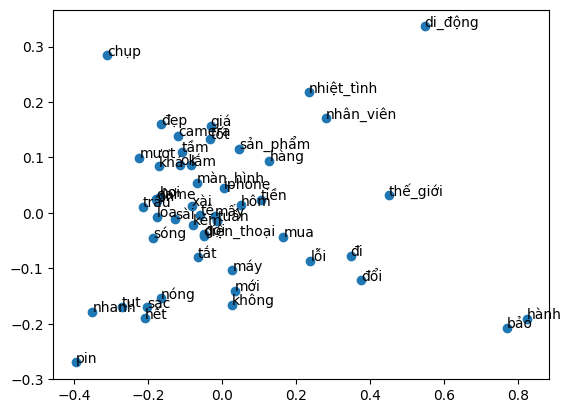

In [27]:
# save model
skipgram.save('skipgram.bin')
# load model
skipgram = Word2Vec.load('skipgram.bin')
# T -SNE plot í one of the way to evaluate word embedding
X = skipgram.wv[skipgram.wv.index_to_key]
X_subset = X[:50]
pca = PCA(n_components=2)
result = pca.fit_transform(X_subset)
pyplot.scatter(result[:,0], result[:,1])
words = list(skipgram.wv.index_to_key)

words_to_plot = words[:50]  # Plot only the first 100 words


for i, word in enumerate(words_to_plot):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Continuous Bag of Word ( CBOW )

In [28]:
# training the model
cbow = Word2Vec(sentences_comments,vector_size=50, window= 3, min_count=1, sg= 0)
print(cbow)

Word2Vec<vocab=2664, vector_size=50, alpha=0.025>


In [29]:
cbow.wv['hỏng']

array([-0.03995228, -0.00544307,  0.05477411,  0.12741102,  0.01028681,
       -0.11781413,  0.13622066,  0.28234404, -0.185571  , -0.04812296,
       -0.04203089, -0.15823042,  0.04523126,  0.17045476, -0.10139504,
        0.06946403,  0.02581208,  0.10174897, -0.26938578, -0.06779275,
        0.00437306,  0.13105279,  0.25389254, -0.09696244,  0.12927078,
        0.02856521, -0.05006683, -0.05273126, -0.23740979,  0.03210013,
       -0.04900569, -0.00060087,  0.04001982, -0.01539107, -0.13615492,
        0.15661117,  0.17391358,  0.08002712,  0.10444415, -0.13646482,
        0.13464476, -0.08580088, -0.09549329,  0.04365418,  0.21412061,
        0.03339436, -0.02211789, -0.10667013,  0.08638636,  0.03760702],
      dtype=float32)

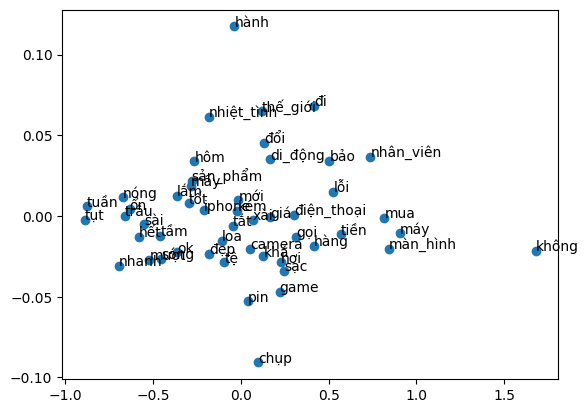

In [30]:
# save model
cbow.save('cbow.bin')
# load model
cbow = Word2Vec.load('cbow.bin')
# T-SNE plot - to evaluate word embedding
X = cbow.wv[cbow.wv.index_to_key]
X_subset = X[:50]

pca = PCA(n_components=2)
result = pca.fit_transform(X_subset)
pyplot.scatter(result[:,0], result[:,1])

words = list(cbow.wv.index_to_key)
words_to_plot = words[:50]

for i, word in enumerate(words_to_plot):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()